# Cluster Analysis 

Doudou Zhang

Goal to find natural groups in data such that items in groups are more similar to each other than those from different clusters

In [ ]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

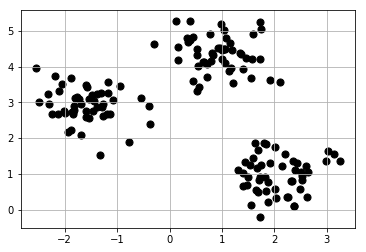

In [2]:
X, y = make_blobs(n_samples = 150, 
                  n_features= 2, 
                  centers = 3, # HWK5 - Cluster -- change 3 to 5, fix all code below
                  cluster_std = 0.5,
                  shuffle = True,
                  random_state = 0)
plt.scatter(X[:,0],
            X[:,1],
            c = 'black',
            marker = 'o',
            s = 50)
plt.grid()

In [3]:
# Algorithm for k-means
# 1. randomly pick k centroids from sample points, use these as initial cluster centers
# 2. assign each element to nearest centroid mu(j) , j in {1,..,k}
# 3. move centroid to center of each cluster
# 4. repeat 2-3 until clusters don't change, tolerance met, or max iter reached


In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters  = 3,  # <- need to set desired clusters
            init = 'random',
            n_init = 10,      # run 10x, k-means cluster algo, chose final model with lowest SSE
            max_iter = 300,   # max iteration for single run
            tol = 1e-04,
            random_state = 0)

y_km = km.fit_predict(X)

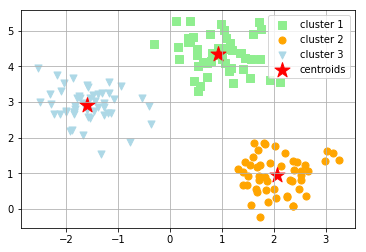

In [5]:
plt.scatter(X[y_km==0,0], X[y_km==0,1],
           s = 50,
           c = 'lightgreen',
           marker = 's',
           label = 'cluster 1')

plt.scatter(X[y_km==1,0], X[y_km==1,1],
           s = 50,
           c = 'orange',
           marker = 'o',
           label = 'cluster 2')

plt.scatter(X[y_km==2,0], X[y_km==2,1],
           s = 50,
           c = 'lightblue',
           marker = 'v',
           label = 'cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
           s = 250,
           marker = '*',
           c = 'red',
           label = 'centroids')

plt.legend()
plt.grid()


In [6]:
# Elbow method for finding optimal number of clusters
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


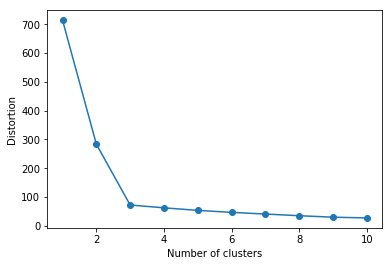

In [7]:
# plot distortion vs number of clusters

distortions = []

for i in range(1,11):
    km = KMeans(n_clusters = i, 
                init = 'k-means++', # method to place initial centroids far apart
                n_init = 10,
                max_iter = 300,
                random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_) # .inertia_ -- sum of squared distances of points to nearest cluster
    
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
# Note k = 3, looks good! 

In [8]:
# Quality of clustering via silhouette plots
# Silhouetter coefficient meaures how tightly grouped are samples in clusters
# 1. calc cluster cohesion a(i) the avg distance between a sample x(i) and all points in same cluster
# 2. calc cluster separation b(i) from the next closest cluster, as avg distance between a sample x(i) and
#    all samples in the nearest cluster
# 3. calc the silhouette s(i) as the difference between cluster cohesion and separation divided by
#    greater of the two, s(i) = (b(i) - a(i))/ max(b(i), a(i))
# s(i) bounded by (-1, 1);  s(i) = 0, if b(i) = a(i); s(i) = 1, if b(i)>>a(i)

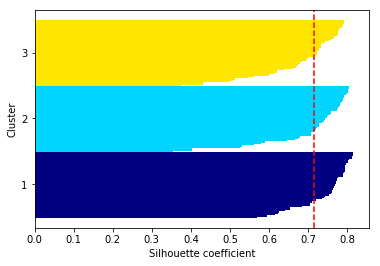

In [9]:
km = KMeans(n_clusters = 3,
            init = 'k-means++',
            n_init = 10, 
            max_iter = 300,
            tol = 1e-04,
            random_state = 0)

y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

#####
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km,
                                   metric = 'euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.) # put y-ticks half way up
    y_ax_lower += len(c_silhouette_vals) # increment y_ax_lower
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
##### 

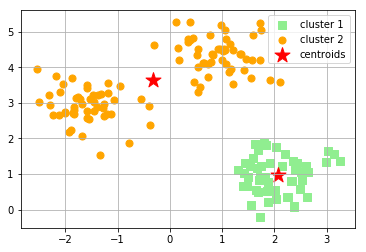

In [10]:
# Let's do a silhouetter plot of a bad clustering
km = KMeans(n_clusters = 2,
           init = 'k-means++',
           n_init = 10,
           max_iter = 300,
           tol = 1e-04,
           random_state = 0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0], X[y_km==0,1],
           s = 50,
           c = 'lightgreen',
           marker = 's',
           label = 'cluster 1')

plt.scatter(X[y_km==1,0], X[y_km==1,1],
           s = 50,
           c = 'orange',
           marker = 'o',
           label = 'cluster 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
           s = 250,
           marker = '*',
           c = 'red',
           label = 'centroids')

plt.legend()
plt.grid()


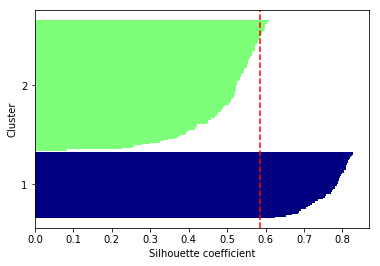

In [11]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km,
                                   metric = 'euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.) # put y-ticks half way up
    y_ax_lower += len(c_silhouette_vals) # increment y_ax_lower
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')


In [12]:
# Organizing clusters as a hierarchical tree
# Agglomerative Clustering using complete linkage approarch

# Algo steps:
# 1. compute distance matrix of all samples
# 2. represent each data point as a singleton cluster
# 3. merge the two closest clusters based on distance of the most dissimilar members
# 4. update the similarity matrix
# 5. repeat 2-4 until one cluster remains

In [13]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X','Y','Z']
labels = ['ID_0', 'ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [14]:
# compute distrance matrix
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(
    pdist(df, metric = 'euclidean')),
    columns = labels, index = labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [15]:
# let's check one:
x = df.loc['ID_0']
y = df.loc['ID_1']

dis = (x - y)**2
dis = dis.sum()
print(dis**(1/2))
# computes sqrt of sum of squared deviations

4.973534001694992


In [17]:
from scipy.cluster.hierarchy import linkage
#help(linkage)

In [18]:
# use initial data array and use 'euclidean' metric as function argument in linkage
row_clusters = linkage(df.values, 
                      method = 'complete',
                      metric = 'euclidean')

# Linkage matrix
pd.DataFrame(row_clusters,
            columns = ['row label 1',
                       'row label 2',
                       'distance', 
                       'no. of items in clust.'],
            index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


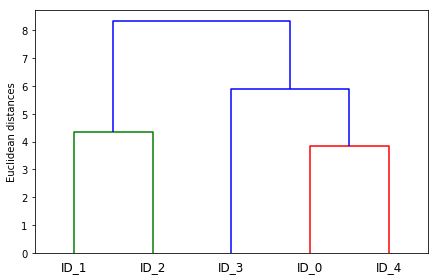

In [19]:
# visualize dendrogram
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters,
                      labels = labels)
plt.tight_layout()
plt.ylabel('Euclidean distances')
# ID_0 & ID_4 cluster, and ID_1 and ID_2, afterwards ID_3 joing first cluster

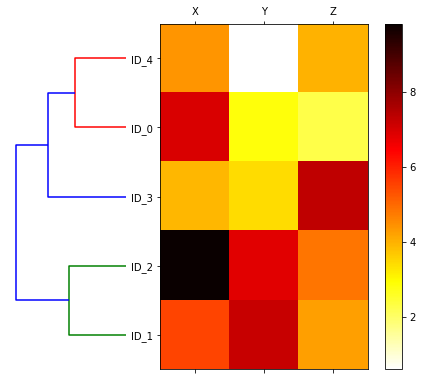

In [20]:
# Attaching dendrograms to heat map
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.ix[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))


In [21]:
# Agglomerative Clustering in Sci-kit Learn
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 2,
                            affinity = 'euclidean',
                            linkage = 'complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


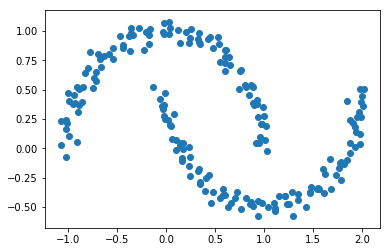

In [22]:
# Locating regions of high density via DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200,
                 noise = 0.05,
                 random_state = 0)

plt.scatter(X[:,0], X[:,1])

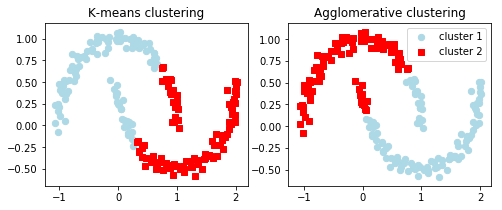

In [24]:
# try k-Means

f, (ax1, ax2) = plt.subplots(1,2, figsize = (8,3))

km = KMeans(n_clusters = 2,
           random_state = 0)

y_km = km.fit_predict(X)

ax1.scatter(X[y_km==0,0], X[y_km==0,1],
           c = 'lightblue',
           marker = 'o',
           s = 40,
           label = 'cluster 1')

ax1.scatter(X[y_km==1,0], X[y_km==1,1],
           c = 'red',
           marker = 's',
           s = 40,
           label = 'cluster 2')

ax1.set_title('K-means clustering')


ac = AgglomerativeClustering(n_clusters=2,
                            affinity = 'euclidean',
                            linkage  = 'complete')

y_ac = ac.fit_predict(X)

ax2.scatter(X[y_ac==0,0], X[y_ac==0,1],
           c = 'lightblue',
           marker = 'o',
           s = 40,
           label = 'cluster 1')

ax2.scatter(X[y_ac==1,0], X[y_ac==1,1],
           c = 'red',
           marker = 's',
           s = 40,
           label = 'cluster 2')

ax2.set_title('Agglomerative clustering')
plt.legend()

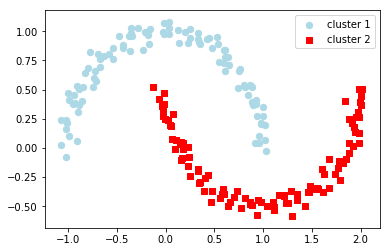

In [25]:
# now let's use DBSCAN
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.2,
           min_samples = 5,
           metric = 'euclidean')

y_db = db.fit_predict(X)

plt.scatter(X[y_db==0,0], X[y_db==0,1],
           c = 'lightblue',
           marker = 'o',
           s = 40,
           label = 'cluster 1')

plt.scatter(X[y_db==1,0], X[y_db==1,1],
           c = 'red',
           marker = 's',
           s = 40,
           label = 'cluster 2')

plt.legend()